## Скачивание библиотек

In [11]:
!pip install requests pandas numpy scipy scikit-learn matplotlib seaborn

## Импорт

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Загрузка данных
from google.colab import files
uploaded = files.upload()

# Чтение данных
import io
df = pd.read_csv(io.BytesIO(uploaded['Bacteria_dataset_Multiresictance.csv']))

Saving Bacteria_dataset_Multiresictance.csv to Bacteria_dataset_Multiresictance (1).csv


KeyError: 'Bacteria_dataset_Multiresictance.csv'

## Базовый анализ данных

In [41]:
print("="*50)
print("БАЗОВЫЙ АНАЛИЗ ДАННЫХ")
print("="*50)

print(f"Размер датасета: {df.shape}")
print(f"Количество строк: {df.shape[0]}")
print(f"Количество столбцов: {df.shape[1]}\n")

print("Информация о типах данных:")
print(df.info())
print("\nПервые 5 строк датасета:")
print(df.head())

print("\nОписательные статистики для числовых признаков:")
print(df.describe())

БАЗОВЫЙ АНАЛИЗ ДАННЫХ
Размер датасета: (10710, 27)
Количество строк: 10710
Количество столбцов: 27

Информация о типах данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10710 entries, 0 to 10709
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 10710 non-null  object
 1   Name               10710 non-null  object
 2   Email              10710 non-null  object
 3   Address            10710 non-null  object
 4   age/gender         10089 non-null  object
 5   Souches            10070 non-null  object
 6   Diabetes           10075 non-null  object
 7   Hypertension       10080 non-null  object
 8   Hospital_before    10073 non-null  object
 9   Infection_Freq     10071 non-null  object
 10  AMX/AMP            10052 non-null  object
 11  AMC                10078 non-null  object
 12  CZ                 10082 non-null  object
 13  FOX                10085 non-null  object
 14  CTX/CRO

In [43]:
# Настройка отображения всех столбцов и строк в Pandas
import pandas as pd

# Устанавливаем максимальное количество отображаемых столбцов и строк
pd.set_option('display.max_columns', None)  # Показать все столбцы
pd.set_option('display.max_rows', 5)     # Показать все строки
pd.set_option('display.width', None)        # Автоподбор ширины таблицы
pd.set_option('display.max_colwidth', None) # Показать полное содержимое ячеек

display(df)

,ID,Name,Email,Address,age/gender,Souches,Diabetes,Hypertension,Hospital_before,Infection_Freq,AMX/AMP,AMC,CZ,FOX,CTX/CRO,IPM,GEN,AN,Acide nalidixique,ofx,CIP,C,Co-trimoxazole,Furanes,colistine,Collection_Date,Notes
0,S290,Elizabeth Lawrence,elizabeth.lawrence@example.com,"6350 Robinson Loaf Apt. 447, Paulfurt, RI 30252",37/F,S290 Escherichia coli,No,No,No,0.0,R,R,R,R,R,R,S,S,S,S,S,R,S,S,S,5 Fev 2025,Patient had fever??
1,S291,Tina Sanders,tina.sanders@example.com,"78594 Galloway Port Suite 762, South Tanyatown, HI 30310",29/F,S291 Morganella morganii,True,No,No,3.0,S,R,S,R,S,R,S,S,S,S,S,S,S,S,S,08/05/2021,تم العلاج
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10708,S10998,April Cox,april.cox@example.com,"985 Julia Freeway Apt. 753, Dianamouth, SD 07610",86/F,S10079 Escherichia coli,No,No,No,2.0,Intermediate,s,r,i,r,Intermediate,r,s,i,r,r,s,Intermediate,r,s,05/03/2022,see file
10709,S10999,Richard Jarvis,richard.jarvis@example.com,"2903 James Motorway Suite 202, Whitakerside, CT 62052",?,NaN,missing,?,NaN,NaN,NaN,missing,?,?,NaN,NaN,missing,NaN,NaN,missing,NaN,?,?,NaN,?,?,NaN


### Анализ пропущенных значений

In [33]:
print("\n" + "="*50)
print("АНАЛИЗ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ")
print("="*50)

missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_info = pd.DataFrame({
    'Количество пропусков': missing_data,
    'Процент пропусков': missing_percent
}).sort_values('Количество пропусков', ascending=False)

print(missing_info[missing_info['Количество пропусков'] > 0])


АНАЛИЗ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ
                   Количество пропусков  Процент пропусков
Collection_Date                     669           6.246499
AMX/AMP                             658           6.143791
GEN                                 643           6.003735
Souches                             640           5.975724
Co-trimoxazole                      640           5.975724
Infection_Freq                      639           5.966387
Hospital_before                     637           5.947712
Furanes                             637           5.947712
colistine                           636           5.938375
Diabetes                            635           5.929038
IPM                                 633           5.910364
CIP                                 633           5.910364
AMC                                 632           5.901027
Hypertension                        630           5.882353
C                                   629           5.873016
AN                         

### Визуализация пропущенных значений

Пропуски сконцентрированы в результатах тестирования антибиотиков, что типично для медицинских данных. Это требует стратегии импутации, учитывающей взаимосвязи между антибиотиками.

Ключевые наблюдения:

- Наибольшее количество пропусков в столбцах антибиотиков (753 пропуска, ~7%);

- Демографические данные имеют минимальные пропуски;

- Структура пропусков указывает на систематические проблемы сбора данных.



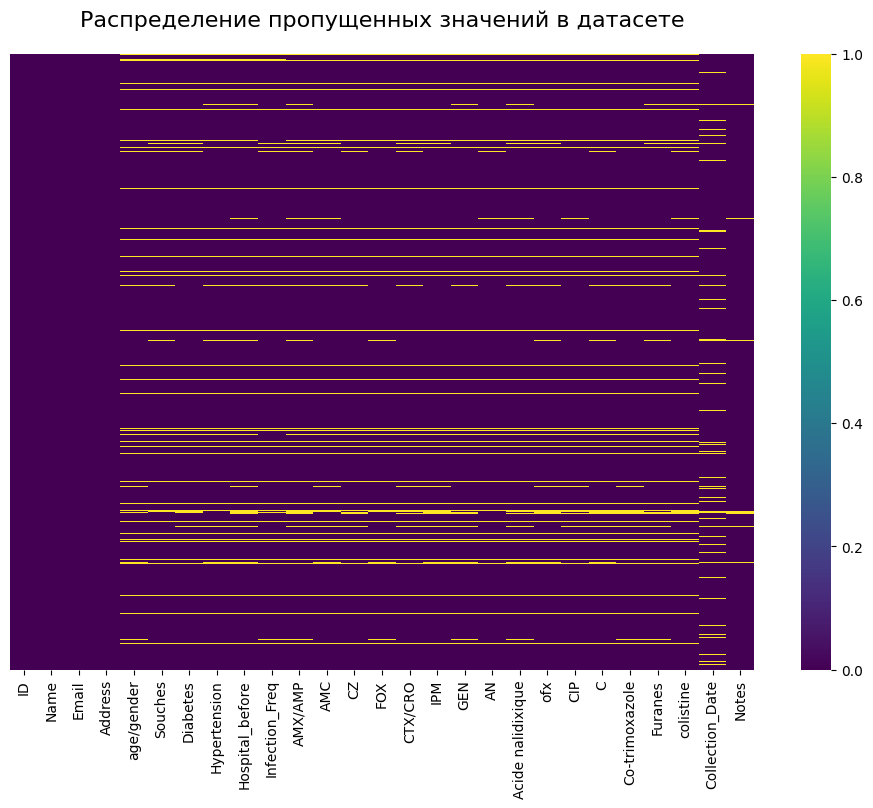

In [34]:
plt.figure(figsize=(12, 8))
missing_plot = sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Распределение пропущенных значений в датасете', fontsize=16, pad=20)
plt.show()

### Анализ категориальных переменных

In [35]:
print("\n" + "="*50)
print("АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПЕРЕМЕННЫХ")
print("="*50)

categorical_cols = ['Gender', 'Diabetes', 'Hypertension', 'Hospital_before', 'Infection_Freq']
for col in categorical_cols:
    if col in df.columns:
        print(f"\n--- {col} ---")
        print(df[col].value_counts())
        print(f"Уникальных значений: {df[col].nunique()}")


АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПЕРЕМЕННЫХ

--- Diabetes ---
Diabetes
No         7883
True       2064
?            64
missing      64
Name: count, dtype: int64
Уникальных значений: 4

--- Hypertension ---
Hypertension
No         7470
Yes        2477
missing      73
?            60
Name: count, dtype: int64
Уникальных значений: 4

--- Hospital_before ---
Hospital_before
No         7008
Yes        2939
missing      64
?            62
Name: count, dtype: int64
Уникальных значений: 4

--- Infection_Freq ---
Infection_Freq
2.0        2966
1.0        2889
3.0        1963
0.0        1896
missing     131
unknown      81
error        81
?            64
Name: count, dtype: int64
Уникальных значений: 8


## Очистка набора данных

In [90]:
import pandas as pd
import numpy as np

print("="*60)
print("ПОЛНАЯ ОЧИСТКА ДАННЫХ И СОЗДАНИЕ НОВОГО ДАТАСЕТА")
print("="*60)

# Загрузка исходных данных
df = pd.read_csv('Bacteria_dataset_Multiresictance.csv')
print(f"Исходный размер датасета: {df.shape}")
print("Столбцы в исходном датасете:")
print(df.columns.tolist())

# Создаем копию датасета для работы
df_clean = df.copy()

# 1.1. УДАЛЕНИЕ НЕНУЖНЫХ СТОЛБЦОВ
print("\n1.1. Удаление личных и идентификационных данных...")
columns_to_drop = ['ID', 'Name', 'Email', 'Address', 'Notes', 'Collection_Date']
df_clean = df_clean.drop(columns=[col for col in columns_to_drop if col in df_clean.columns])
print(f"Осталось столбцов: {len(df_clean.columns)}")
print("Оставшиеся столбцы:")
print(df_clean.columns.tolist())

# 1.2. ОБРАБОТКА СТОЛБЦА 'age/gender'
print("\n1.2. Обработка столбца 'age/gender'...")

def extract_age_gender(value):
    if pd.isna(value):
        return np.nan, np.nan
    try:
        value_str = str(value).strip()
        if '/' in value_str:
            parts = value_str.split('/')
            if len(parts) >= 2:
                age, gender = parts[0], parts[1]
                # Очистка возраста
                age = ''.join(filter(str.isdigit, age))
                age = int(age) if age else np.nan
                # Очистка пола
                gender = gender.upper().strip()
                gender = gender if gender in ['M', 'F'] else np.nan
                return age, gender
        return np.nan, np.nan
    except:
        return np.nan, np.nan

# Применяем функцию
age_gender_results = df_clean['age/gender'].apply(extract_age_gender)
df_clean['Age'] = [result[0] for result in age_gender_results]
df_clean['Gender'] = [result[1] for result in age_gender_results]
df_clean = df_clean.drop('age/gender', axis=1)

print(f"Успешно извлечено: {df_clean['Age'].notna().sum()} возрастов, {df_clean['Gender'].notna().sum()} полов")

# 1.3. ОБРАБОТКА СТОЛБЦА 'Souche' (ВИДЫ БАКТЕРИЙ) - ИСПРАВЛЕННОЕ НАЗВАНИЕ
print("\n1.3. Обработка видов бактерий...")

def extract_bacteria_species(souche):
    if pd.isna(souche):
        return np.nan
    try:
        souche_str = str(souche).strip()
        # Удаляем код вида (типа S290) и оставляем только название
        parts = souche_str.split()
        if len(parts) > 1:
            # Пропускаем первый элемент (код) и объединяем остальное
            species_name = ' '.join(parts[1:])
            return species_name if species_name else np.nan
        else:
            return np.nan
    except:
        return np.nan

# Используем правильное название столбца - 'Souche' вместо 'Souches'
df_clean['Bacteria_Species'] = df_clean['Souches'].apply(extract_bacteria_species)
df_clean = df_clean.drop('Souches', axis=1)

# Очистка названий бактерий - стандартизация
def clean_bacteria_name(name):
    if pd.isna(name):
        return np.nan
    name_str = str(name).strip().title()
    # Заменяем множественные пробелы на один
    name_str = ' '.join(name_str.split())
    return name_str

df_clean['Bacteria_Species'] = df_clean['Bacteria_Species'].apply(clean_bacteria_name)

print(f"Уникальных видов бактерий: {df_clean['Bacteria_Species'].nunique()}")

# 1.4. СТАНДАРТИЗАЦИЯ КАТЕГОРИАЛЬНЫХ ПЕРЕМЕННЫХ
print("\n1.4. Стандартизация категориальных переменных...")

# Функция для стандартизации бинарных переменных
def standardize_binary(value):
    if pd.isna(value):
        return np.nan
    value_str = str(value).lower().strip()
    if value_str in ['yes', 'true', '1', 'y']:
        return 'Yes'
    elif value_str in ['no', 'false', '0', 'n']:
        return 'No'
    else:
        return np.nan

# Применяем к факторам риска
binary_columns = ['Diabetes', 'Hypertension', 'Hospital_before']
for col in binary_columns:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].apply(standardize_binary)
        print(f"{col}: {df_clean[col].value_counts().to_dict()}")

# 1.5. СТАНДАРТИЗАЦИЯ РЕЗУЛЬТАТОВ АНТИБИОТИКОТЕСТИРОВАНИЯ
print("\n1.5. Стандартизация результатов антибиотикотестирования...")

antibiotics_columns = ['AMX/AMP', 'AMC', 'CZ', 'FOX', 'CTX/CRO', 'IPM', 'GEN', 'AN',
                      'Acide nalidixique', 'ofx', 'CIP', 'C', 'Co-trimoxazole', 'Furanes', 'colistine']

def standardize_antibiotic_result(value):
    if pd.isna(value):
        return np.nan
    value_str = str(value).upper().strip()
    if value_str in ['R', 'RESISTANT']:
        return 'R'
    elif value_str in ['S', 'SUSCEPTIBLE']:
        return 'S'
    elif value_str in ['I', 'INTERMEDIATE']:
        return 'I'
    else:
        return np.nan

for ab_col in antibiotics_columns:
    if ab_col in df_clean.columns:
        df_clean[ab_col] = df_clean[ab_col].apply(standardize_antibiotic_result)
        # Статистика по каждому антибиотику
        if df_clean[ab_col].notna().sum() > 0:
            resistance_rate = (df_clean[ab_col] == 'R').sum() / df_clean[ab_col].notna().sum() * 100
            print(f"  {ab_col}: {resistance_rate:.1f}% резистентности")

print("Стандартизация завершена")

# 1.6. ОБРАБОТКА Infection_Freq
print("\n1.6. Обработка частоты инфекций...")

def standardize_infection_freq(value):
    if pd.isna(value):
        return np.nan
    value_str = str(value).lower().strip()
    if value_str in ['0', '0.0', 'never']:
        return 'Never'
    elif value_str in ['1', '1.0', 'rarely']:
        return 'Rarely'
    elif value_str in ['2', '2.0', 'regularly']:
        return 'Regularly'
    elif value_str in ['3', '3.0', 'often']:
        return 'Often'
    else:
        return np.nan

df_clean['Infection_Freq'] = df_clean['Infection_Freq'].apply(standardize_infection_freq)
print(f"Infection_Freq: {df_clean['Infection_Freq'].value_counts().to_dict()}")

# 1.7. ДОПОЛНИТЕЛЬНАЯ ОЧИСТКА - ОБРАБОТКА ПРОПУСКОВ
print("\n1.7. Обработка пропущенных значений...")

# Анализ пропусков до очистки
print("Пропуски до обработки:")
missing_before = df_clean.isnull().sum().sort_values(ascending=False)
print(missing_before[missing_before > 0].head(10))

# Заполняем пропуски в категориальных переменных
categorical_columns = ['Gender', 'Diabetes', 'Hypertension', 'Hospital_before', 'Infection_Freq', 'Bacteria_Species']
for col in categorical_columns:
    if col in df_clean.columns:
        if col == 'Bacteria_Species':
            df_clean[col] = df_clean[col].fillna('Unknown_Bacteria')
        else:
            df_clean[col] = df_clean[col].fillna('Unknown')

# Для числовых переменных - медиана
if 'Age' in df_clean.columns:
    df_clean['Age'] = df_clean['Age'].fillna(df_clean['Age'].median())

# Для антибиотиков оставляем как есть (будут обрабатываться в модели)

print("Пропуски после обработки:")
missing_after = df_clean.isnull().sum().sort_values(ascending=False)
print(missing_after[missing_after > 0].head(10))

ПОЛНАЯ ОЧИСТКА ДАННЫХ И СОЗДАНИЕ НОВОГО ДАТАСЕТА
Исходный размер датасета: (10710, 27)
Столбцы в исходном датасете:
['ID', 'Name', 'Email', 'Address', 'age/gender', 'Souches', 'Diabetes', 'Hypertension', 'Hospital_before', 'Infection_Freq', 'AMX/AMP', 'AMC', 'CZ', 'FOX', 'CTX/CRO', 'IPM', 'GEN', 'AN', 'Acide nalidixique', 'ofx', 'CIP', 'C', 'Co-trimoxazole', 'Furanes', 'colistine', 'Collection_Date', 'Notes']

1.1. Удаление личных и идентификационных данных...
Осталось столбцов: 21
Оставшиеся столбцы:
['age/gender', 'Souches', 'Diabetes', 'Hypertension', 'Hospital_before', 'Infection_Freq', 'AMX/AMP', 'AMC', 'CZ', 'FOX', 'CTX/CRO', 'IPM', 'GEN', 'AN', 'Acide nalidixique', 'ofx', 'CIP', 'C', 'Co-trimoxazole', 'Furanes', 'colistine']

1.2. Обработка столбца 'age/gender'...
Успешно извлечено: 9947 возрастов, 9947 полов

1.3. Обработка видов бактерий...
Уникальных видов бактерий: 19

1.4. Стандартизация категориальных переменных...
Diabetes: {'No': 7883, 'Yes': 2064}
Hypertension: {'No': 7

### Расчет MDR (Множественная лекарственная устойчивость)

In [85]:
print("\n" + "="*50)
print("ЭТАП 2: РАСЧЕТ MDR СТАТУСА")
print("="*50)

# Определяем семейства антибиотиков
antibiotic_families = {
    'Beta-lactams': ['AMX/AMP', 'AMC', 'CZ', 'FOX', 'CTX/CRO', 'IPM'],
    'Aminoglycosides': ['GEN', 'AN'],
    'Quinolones': ['Acide nalidixique', 'ofx', 'CIP'],
    'Other': ['C', 'Co-trimoxazole', 'Furanes', 'colistine']
}

def calculate_mdr_status(row):
    """
    Рассчитывает MDR статус: устойчивость к >=3 семействам антибиотиков
    """
    families_resisted = 0

    for family, antibiotics in antibiotic_families.items():
        family_resistant = False
        tested_antibiotics = 0

        for ab in antibiotics:
            if ab in df_clean.columns and pd.notna(row[ab]):
                tested_antibiotics += 1
                if row[ab] == 'R':
                    family_resistant = True
                    break

        # Считаем семейство резистентным, если есть хотя бы один тест и обнаружена резистентность
        if family_resistant and tested_antibiotics > 0:
            families_resisted += 1

    return families_resisted

# Применяем функцию
df_clean['MDR_Count'] = df_clean.apply(calculate_mdr_status, axis=1)
df_clean['MDR_Binary'] = (df_clean['MDR_Count'] >= 3).astype(int)

print("Распределение MDR:")
mdr_distribution = df_clean['MDR_Count'].value_counts().sort_index()
for count, freq in mdr_distribution.items():
    percentage = (freq / len(df_clean)) * 100
    print(f"  Устойчивость к {count} семействам: {freq} изолятов ({percentage:.1f}%)")

mdr_cases = df_clean['MDR_Binary'].sum()
mdr_percentage = (mdr_cases / len(df_clean)) * 100
print(f"\nMDR (≥3 семейств): {mdr_cases} изолятов ({mdr_percentage:.2f}%)")


ЭТАП 2: РАСЧЕТ MDR СТАТУСА
Распределение MDR:
  Устойчивость к 0 семействам: 975 изолятов (9.1%)
  Устойчивость к 1 семействам: 2593 изолятов (24.2%)
  Устойчивость к 2 семействам: 4052 изолятов (37.8%)
  Устойчивость к 3 семействам: 2428 изолятов (22.7%)
  Устойчивость к 4 семействам: 662 изолятов (6.2%)

MDR (≥3 семейств): 3090 изолятов (28.85%)


### Финальная проверка и сохранение

In [92]:
print("\n" + "="*50)
print("ЭТАП 3: ФИНАЛЬНАЯ ПРОВЕРКА И СОХРАНЕНИЕ")
print("="*50)

# Проверка финального состояния данных
print("ФИНАЛЬНАЯ СТАТИСТИКА ДАННЫХ:")
print(f"Размер датасета: {df_clean.shape}")
print(f"Количество столбцов: {len(df_clean.columns)}")
print(f"Количество строк: {len(df_clean)}")

print("\nТИПЫ ДАННЫХ:")
print(df_clean.dtypes.value_counts())

print("\nПРОПУЩЕННЫЕ ЗНАЧЕНИЯ:")
missing_final = df_clean.isnull().sum()
missing_percent = (missing_final / len(df_clean)) * 100
missing_info = pd.DataFrame({
    'Пропуски': missing_final,
    'Процент': missing_percent
}).sort_values('Пропуски', ascending=False)

print(missing_info[missing_info['Пропуски'] > 0])

print("\nСТАТИСТИКА MDR:")
print(f"Всего изолятов: {len(df_clean)}")
print(f"MDR случаев: {df_clean['MDR_Binary'].sum()} ({df_clean['MDR_Binary'].mean()*100:.2f}%)")
print(f"Non-MDR случаев: {(df_clean['MDR_Binary'] == 0).sum()} ({((df_clean['MDR_Binary'] == 0).sum()/len(df_clean))*100:.2f}%)")

# Статистика по антибиотикам
print("\nСТАТИСТИКА ПО АНТИБИОТИКАМ:")
for ab in antibiotics_columns:
    if ab in df_clean.columns:
        tested = df_clean[ab].notna().sum()
        resistant = (df_clean[ab] == 'R').sum()
        resistant_pct = (resistant / tested * 100) if tested > 0 else 0
        print(f"  {ab}: {resistant_pct:.1f}% резистентности ({tested} тестов)")

# Сохраняем очищенный датасет
output_filename = 'bacteria_data_fully_cleaned_v2.csv'
df_clean.to_csv(output_filename, index=False, encoding='utf-8')

print(f"\n✅ Очищенный датасет сохранен как: {output_filename}")
print(f"📊 Размер сохраненного файла: {df_clean.shape}")

# Создаем сводный отчет
summary_report = f"""
📋 ОТЧЕТ ПО ОЧИСТКЕ ДАННЫХ (ВЕРСИЯ 2)
====================================

ИСХОДНЫЕ ДАННЫЕ:
• Записей: {len(df)}
• Столбцов: {len(df.columns)}

ОЧИЩЕННЫЕ ДАННЫЕ:
• Записей: {len(df_clean)}
• Столбцов: {len(df_clean.columns)}
• MDR случаев: {df_clean['MDR_Binary'].sum()} ({df_clean['MDR_Binary'].mean()*100:.2f}%)

УДАЛЕННЫЕ СТОЛБЦЫ:
{columns_to_drop}

НОВЫЕ СТОЛБЦЫ:
• Age (извлечен из age/gender)
• Gender (извлечен из age/gender)
• Bacteria_Species (очищен из Souche)
• MDR_Count (рассчитан)
• MDR_Binary (рассчитан)

СТАТИСТИКА MDR:
{df_clean['MDR_Count'].value_counts().sort_index().to_string()}

ТОП-5 ВИДОВ БАКТЕРИЙ:
{df_clean['Bacteria_Species'].value_counts().head().to_string()}

ДАННЫЕ ГОТОВЫ ДЛЯ МОДЕЛИРОВАНИЯ!
"""

print(summary_report)

# Дополнительно: сохраняем сводную статистику
stats_filename = 'data_cleaning_summary_v2.txt'
with open(stats_filename, 'w', encoding='utf-8') as f:
    f.write(summary_report)

print(f"📄 Сводный отчет сохранен как: {stats_filename}")


ЭТАП 3: ФИНАЛЬНАЯ ПРОВЕРКА И СОХРАНЕНИЕ
ФИНАЛЬНАЯ СТАТИСТИКА ДАННЫХ:
Размер датасета: (10710, 24)
Количество столбцов: 24
Количество строк: 10710

ТИПЫ ДАННЫХ:
object     21
int64       2
float64     1
Name: count, dtype: int64

ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ:
     Пропуски   Процент
FOX       753  7.030812
CZ        753  7.030812
..        ...       ...
ofx       753  7.030812
CIP       753  7.030812

[15 rows x 2 columns]

СТАТИСТИКА MDR:
Всего изолятов: 10710
MDR случаев: 3090 (28.85%)
Non-MDR случаев: 7620 (71.15%)

СТАТИСТИКА ПО АНТИБИОТИКАМ:
  AMX/AMP: 57.4% резистентности (9957 тестов)
  AMC: 58.4% резистентности (9957 тестов)
  CZ: 57.1% резистентности (9957 тестов)
  FOX: 57.6% резистентности (9957 тестов)
  CTX/CRO: 57.7% резистентности (9957 тестов)
  IPM: 57.4% резистентности (9957 тестов)
  GEN: 19.4% резистентности (9957 тестов)
  AN: 19.1% резистентности (9957 тестов)
  Acide nalidixique: 13.9% резистентности (9957 тестов)
  ofx: 13.9% резистентности (9957 тестов)
  CIP: 14.5% ре

### Версия для ML с дополнительной очисткой

In [93]:
print("\n" + "="*50)
print("СОЗДАНИЕ ML-ГОТОВОЙ ВЕРСИИ ДАТАСЕТА")
print("="*50)

# Создаем версию с дополнительной обработкой для ML
df_ml = df_clean.copy()

# Дополнительная обработка для ML:
# 1. Удаляем строки с большим количеством пропусков в антибиотиках
print("Удаление строк с недостаточными данными по антибиотикам...")

# Считаем количество заполненных тестов на антибиотики для каждой строки
antibiotic_test_count = df_ml[antibiotics_columns].notna().sum(axis=1)
print(f"Среднее количество тестов на антибиотики: {antibiotic_test_count.mean():.1f}")

# Удаляем строки с менее чем 5 тестами на антибиотики (слишком мало данных)
rows_before = len(df_ml)
df_ml = df_ml[antibiotic_test_count >= 5]
rows_after = len(df_ml)
rows_removed = rows_before - rows_after

print(f"Удалено строк с недостаточными данными: {rows_removed} ({rows_removed/rows_before*100:.1f}%)")
print(f"Осталось строк: {rows_after}")

# 2. Сохраняем ML-версию
ml_filename = 'bacteria_data_ml_ready_v2.csv'
df_ml.to_csv(ml_filename, index=False, encoding='utf-8')

print(f"✅ ML-версия датасета сохранена как: {ml_filename}")
print(f"📊 Размер ML-версии: {df_ml.shape}")

# Сравнение двух версий
comparison_report = f"""
📊 СРАВНЕНИЕ ВЕРСИЙ ДАТАСЕТОВ
============================

ПОЛНАЯ ОЧИЩЕННАЯ ВЕРСИЯ:
• Записей: {len(df_clean)}
• MDR случаев: {df_clean['MDR_Binary'].sum()} ({df_clean['MDR_Binary'].mean()*100:.2f}%)
• Использование: Анализ, EDA

ML-ГОТОВАЯ ВЕРСИЯ:
• Записей: {len(df_ml)}
• MDR случаев: {df_ml['MDR_Binary'].sum()} ({df_ml['MDR_Binary'].mean()*100:.2f}%)
• Использование: Обучение моделей ML
• Условие: ≥5 тестов на антибиотики на изолят

УДАЛЕНО ДЛЯ ML-ВЕРСИИ: {rows_removed} записей ({rows_removed/rows_before*100:.1f}%)
"""

print(comparison_report)


СОЗДАНИЕ ML-ГОТОВОЙ ВЕРСИИ ДАТАСЕТА
Удаление строк с недостаточными данными по антибиотикам...
Среднее количество тестов на антибиотики: 13.9
Удалено строк с недостаточными данными: 753 (7.0%)
Осталось строк: 9957
✅ ML-версия датасета сохранена как: bacteria_data_ml_ready_v2.csv
📊 Размер ML-версии: (9957, 24)

📊 СРАВНЕНИЕ ВЕРСИЙ ДАТАСЕТОВ

ПОЛНАЯ ОЧИЩЕННАЯ ВЕРСИЯ:
• Записей: 10710
• MDR случаев: 3090 (28.85%)
• Использование: Анализ, EDA

ML-ГОТОВАЯ ВЕРСИЯ:
• Записей: 9957 
• MDR случаев: 3090 (31.03%)
• Использование: Обучение моделей ML
• Условие: ≥5 тестов на антибиотики на изолят

УДАЛЕНО ДЛЯ ML-ВЕРСИИ: 753 записей (7.0%)



### Финальная проверка качества данных

In [94]:
print("\n" + "="*50)
print("ФИНАЛЬНАЯ ПРОВЕРКА КАЧЕСТВА ДАННЫХ")
print("="*50)

def check_data_quality(df, dataset_name):
    """Функция для проверки качества данных"""
    print(f"\n🔍 ПРОВЕРКА КАЧЕСТВА: {dataset_name}")
    print(f"Размер: {df.shape}")

    # Проверка пропусков
    total_missing = df.isnull().sum().sum()
    total_cells = df.shape[0] * df.shape[1]
    missing_percentage = (total_missing / total_cells) * 100
    print(f"Пропуски: {total_missing}/{total_cells} ({missing_percentage:.2f}%)")

    # Проверка MDR распределения
    mdr_percentage = df['MDR_Binary'].mean() * 100
    print(f"MDR распределение: {mdr_percentage:.2f}%")

    # Проверка уникальных значений
    print(f"Уникальных видов бактерий: {df['Bacteria_Species'].nunique()}")

    # Проверка возраста
    if 'Age' in df.columns:
        print(f"Возраст: {df['Age'].min()}-{df['Age'].max()} лет, медиана: {df['Age'].median()}")

    # Проверка пола
    if 'Gender' in df.columns:
        gender_dist = df['Gender'].value_counts(normalize=True) * 100
        print(f"Распределение по полу: {gender_dist.to_dict()}")

    return {
        'dataset': dataset_name,
        'rows': df.shape[0],
        'columns': df.shape[1],
        'missing_percentage': missing_percentage,
        'mdr_percentage': mdr_percentage,
        'bacteria_species_count': df['Bacteria_Species'].nunique()
    }

# Проверяем обе версии
quality_full = check_data_quality(df_clean, "Полная очищенная версия")
quality_ml = check_data_quality(df_ml, "ML-готовая версия")

print("\n✅ ОЧИСТКА ДАННЫХ ЗАВЕРШЕНА УСПЕШНО!")
print("📁 СОЗДАНЫ ФАЙЛЫ:")
print(f"   • {output_filename} - полная очищенная версия")
print(f"   • {ml_filename} - версия для машинного обучения")
print(f"   • {stats_filename} - сводный отчет")


ФИНАЛЬНАЯ ПРОВЕРКА КАЧЕСТВА ДАННЫХ

🔍 ПРОВЕРКА КАЧЕСТВА: Полная очищенная версия
Размер: (10710, 24)
Пропуски: 11295/257040 (4.39%)
MDR распределение: 28.85%
Уникальных видов бактерий: 20
Возраст: 0.0-90.0 лет, медиана: 45.0
Распределение по полу: {'F': 74.03361344537815, 'M': 18.8422035480859, 'Unknown': 7.124183006535947}

🔍 ПРОВЕРКА КАЧЕСТВА: ML-готовая версия
Размер: (9957, 24)
Пропуски: 0/238968 (0.00%)
MDR распределение: 31.03%
Уникальных видов бактерий: 20
Возраст: 0.0-90.0 лет, медиана: 45.0
Распределение по полу: {'F': 79.63241940343477, 'M': 20.267148739580197, 'Unknown': 0.10043185698503565}

✅ ОЧИСТКА ДАННЫХ ЗАВЕРШЕНА УСПЕШНО!
📁 СОЗДАНЫ ФАЙЛЫ:
   • bacteria_data_fully_cleaned_v2.csv - полная очищенная версия
   • bacteria_data_ml_ready_v2.csv - версия для машинного обучения
   • data_cleaning_summary_v2.txt - сводный отчет


## Визуализация очищенных данных


ЭТАП 3: ВИЗУАЛИЗАЦИИ ОЧИЩЕННЫХ ДАННЫХ
3.1. Визуализация демографических данных...


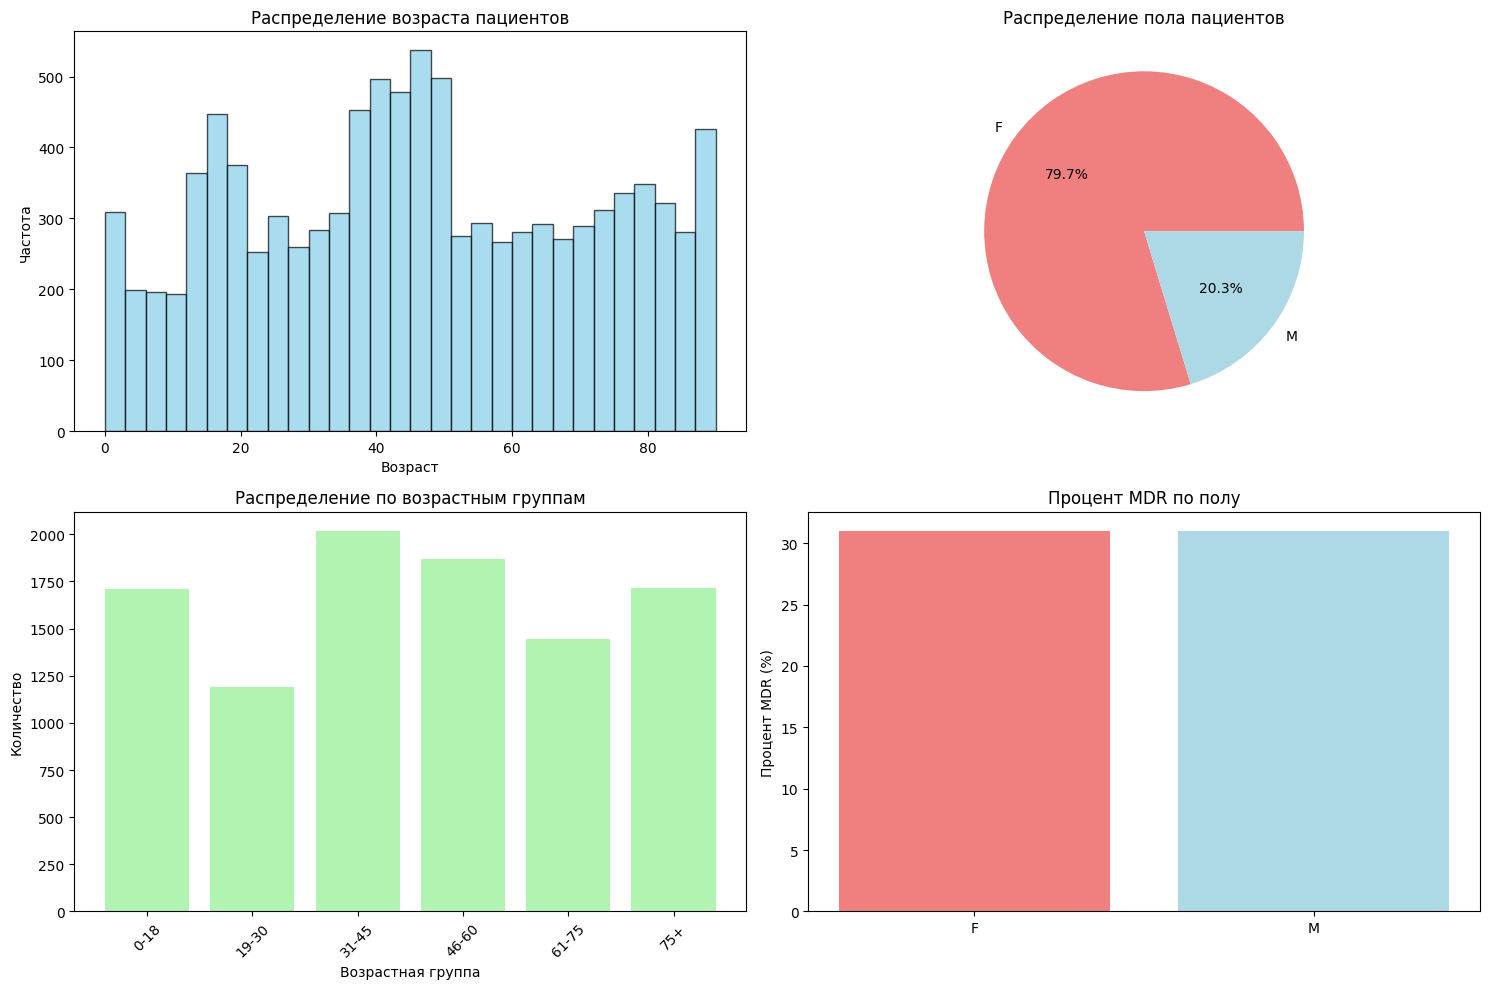

In [54]:
print("\n" + "="*50)
print("ЭТАП 3: ВИЗУАЛИЗАЦИИ ОЧИЩЕННЫХ ДАННЫХ")
print("="*50)

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# 3.1. РАСПРЕДЕЛЕНИЕ ВОЗРАСТА И ПОЛА
print("3.1. Визуализация демографических данных...")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Распределение возраста
axes[0,0].hist(df_clean['Age'].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0,0].set_title('Распределение возраста пациентов')
axes[0,0].set_xlabel('Возраст')
axes[0,0].set_ylabel('Частота')

# Распределение пола
gender_counts = df_clean['Gender'].value_counts()
axes[0,1].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
axes[0,1].set_title('Распределение пола пациентов')

# Возрастные группы
age_bins = [0, 18, 30, 45, 60, 75, 100]
age_labels = ['0-18', '19-30', '31-45', '46-60', '61-75', '75+']
df_clean['Age_Group'] = pd.cut(df_clean['Age'], bins=age_bins, labels=age_labels, right=False)
age_group_counts = df_clean['Age_Group'].value_counts().sort_index()

axes[1,0].bar(age_group_counts.index, age_group_counts.values, color='lightgreen', alpha=0.7)
axes[1,0].set_title('Распределение по возрастным группам')
axes[1,0].set_xlabel('Возрастная группа')
axes[1,0].set_ylabel('Количество')
axes[1,0].tick_params(axis='x', rotation=45)

# MDR по полу
mdr_by_gender = df_clean.groupby('Gender')['MDR_Binary'].mean() * 100
axes[1,1].bar(mdr_by_gender.index, mdr_by_gender.values, color=['lightcoral', 'lightblue'])
axes[1,1].set_title('Процент MDR по полу')
axes[1,1].set_ylabel('Процент MDR (%)')

plt.tight_layout()
plt.show()

### Распределение видов бактерий и MDR


3.2. Анализ распределения бактерий и MDR...


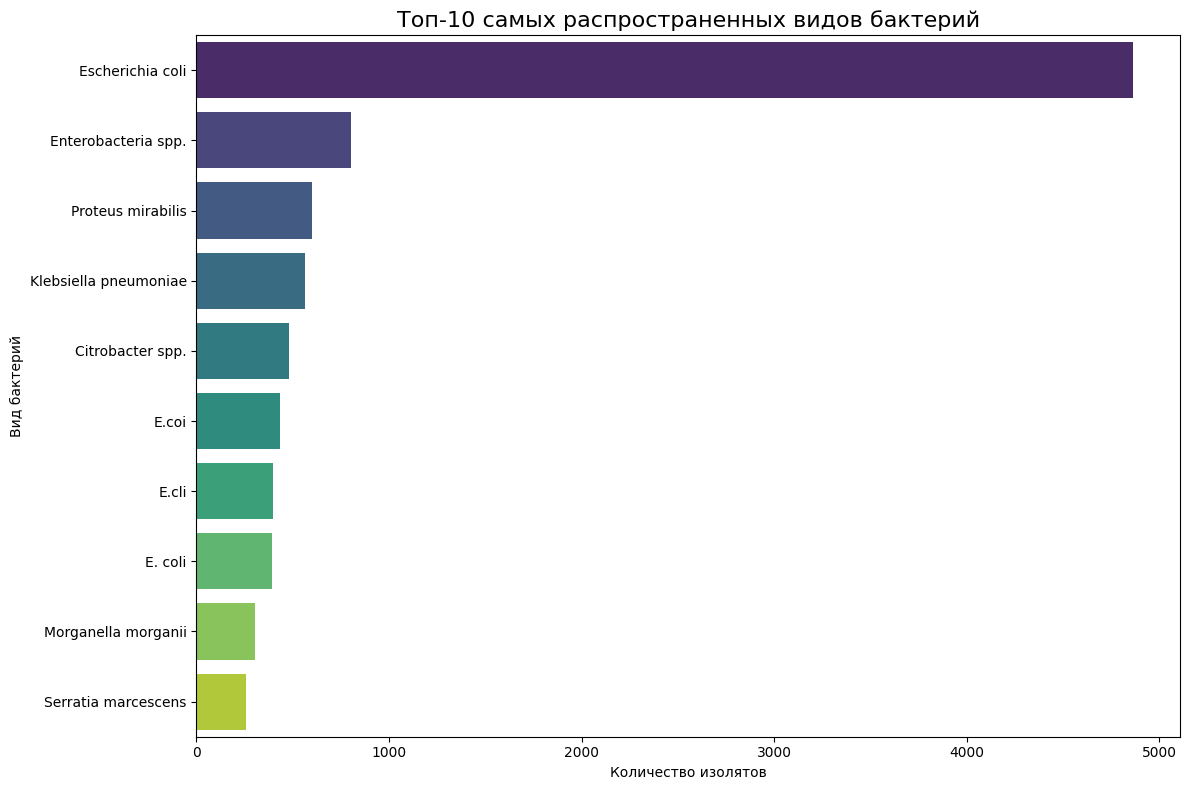

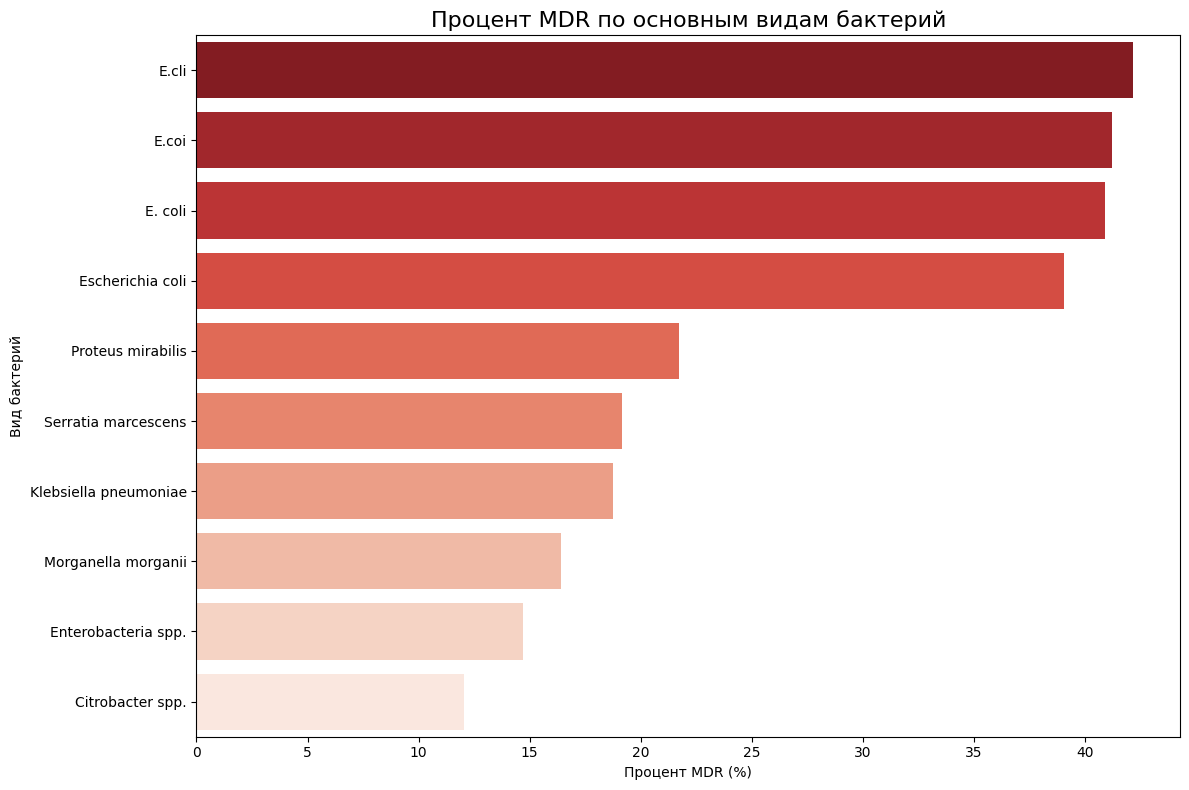

In [55]:
print("\n3.2. Анализ распределения бактерий и MDR...")

# Топ-10 самых распространенных бактерий
top_bacteria = df_clean['Bacteria_Species'].value_counts().head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_bacteria.values, y=top_bacteria.index, palette='viridis')
plt.title('Топ-10 самых распространенных видов бактерий', fontsize=16)
plt.xlabel('Количество изолятов')
plt.ylabel('Вид бактерий')
plt.tight_layout()
plt.show()

# MDR по видам бактерий (топ-10)
top_bacteria_list = top_bacteria.index
bacteria_mdr = df_clean[df_clean['Bacteria_Species'].isin(top_bacteria_list)].groupby('Bacteria_Species')['MDR_Binary'].agg(['mean', 'count'])
bacteria_mdr = bacteria_mdr.sort_values('mean', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=bacteria_mdr['mean']*100, y=bacteria_mdr.index, palette='Reds_r')
plt.title('Процент MDR по основным видам бактерий', fontsize=16)
plt.xlabel('Процент MDR (%)')
plt.ylabel('Вид бактерий')
plt.tight_layout()
plt.show()

Доминирование E. coli соответствует эпидемиологическим данным о наиболее распространенных возбудителях инфекций.

Разные виды бактерий имеют различную предрасположенность к развитию MDR, что должно учитываться при прогнозировании.

### Анализ резистентности к антибиотикам


3.3. Анализ резистентности к антибиотикам...


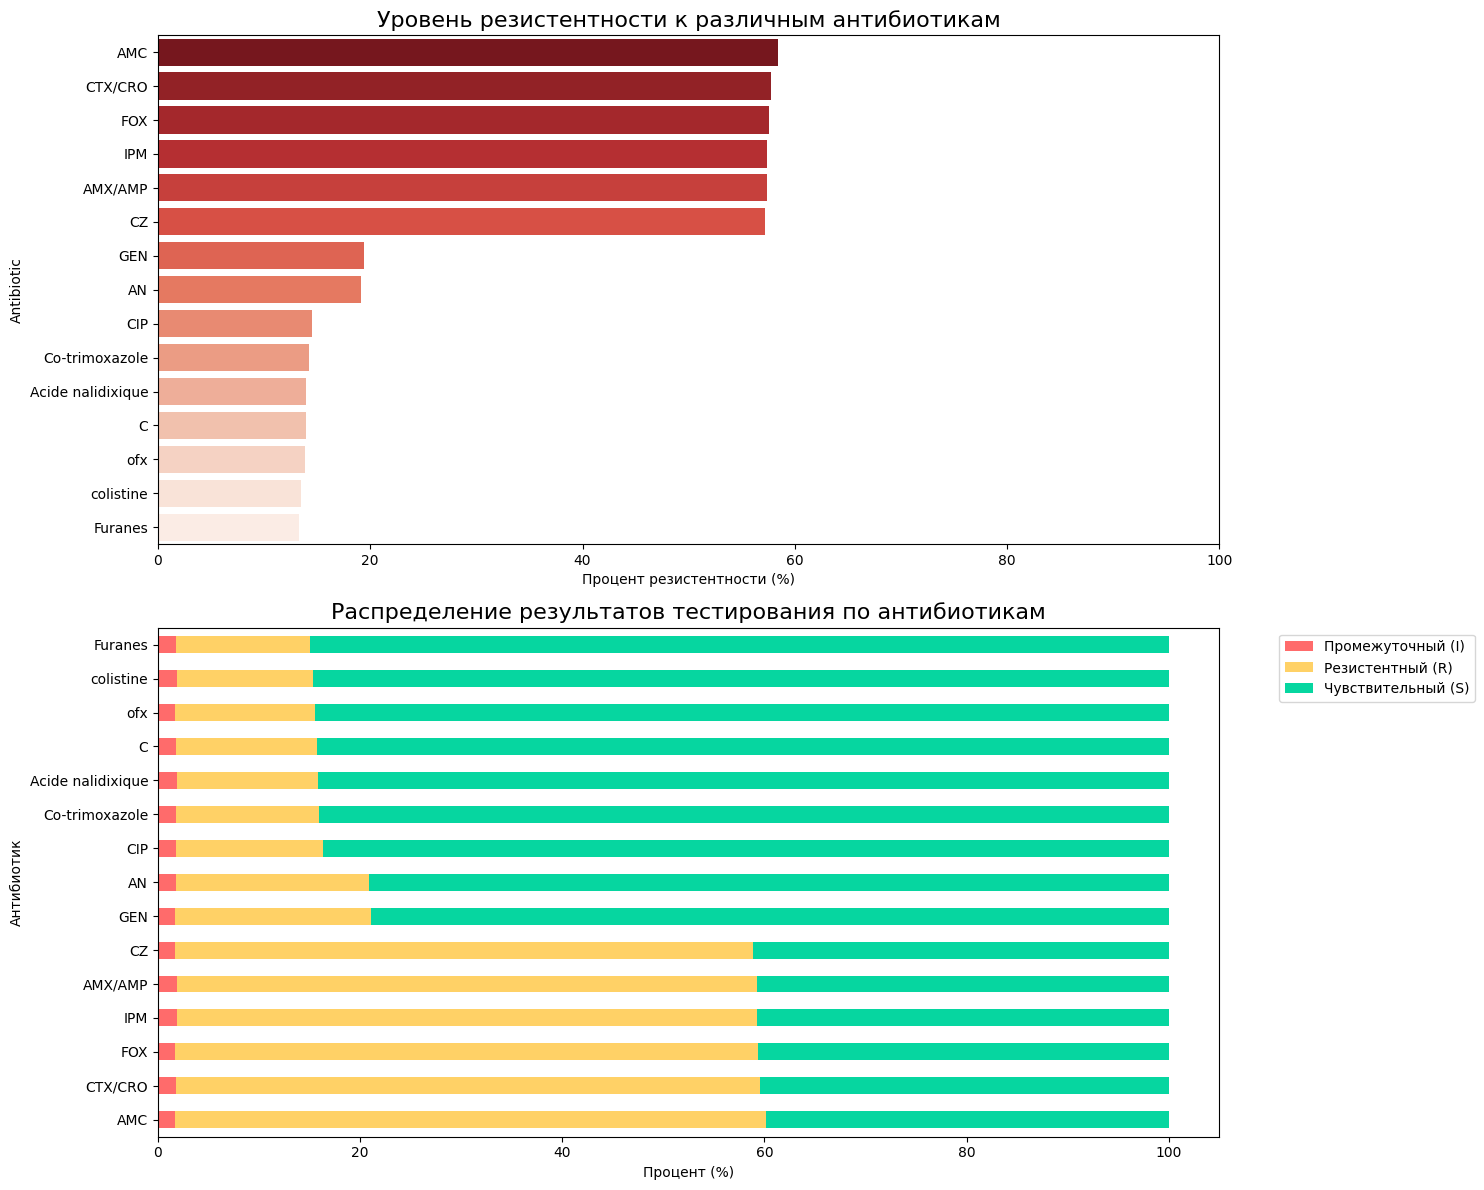

In [56]:
print("\n3.3. Анализ резистентности к антибиотикам...")

# Подготовка данных по антибиотикам
ab_resistance_data = []
for ab in antibiotics_columns:
    if ab in df_clean.columns:
        total_tested = df_clean[ab].notna().sum()
        if total_tested > 0:
            resistance_rate = (df_clean[ab] == 'R').sum() / total_tested * 100
            susceptible_rate = (df_clean[ab] == 'S').sum() / total_tested * 100
            intermediate_rate = (df_clean[ab] == 'I').sum() / total_tested * 100

            ab_resistance_data.append({
                'Antibiotic': ab,
                'Resistance_Rate': resistance_rate,
                'Susceptible_Rate': susceptible_rate,
                'Intermediate_Rate': intermediate_rate,
                'Tested_Count': total_tested
            })

ab_resistance_df = pd.DataFrame(ab_resistance_data).sort_values('Resistance_Rate', ascending=False)

# Визуализация резистентности
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# График резистентности
sns.barplot(data=ab_resistance_df, x='Resistance_Rate', y='Antibiotic', ax=ax1, palette='Reds_r')
ax1.set_title('Уровень резистентности к различным антибиотикам', fontsize=16)
ax1.set_xlabel('Процент резистентности (%)')
ax1.set_xlim(0, 100)

# Stacked bar chart по статусам
ab_melted = ab_resistance_df.melt(id_vars=['Antibiotic'],
                                  value_vars=['Resistance_Rate', 'Intermediate_Rate', 'Susceptible_Rate'],
                                  var_name='Status', value_name='Percentage')

ab_melted['Status'] = ab_melted['Status'].replace({
    'Resistance_Rate': 'Резистентный (R)',
    'Intermediate_Rate': 'Промежуточный (I)',
    'Susceptible_Rate': 'Чувствительный (S)'
})

pivot_df = ab_melted.pivot(index='Antibiotic', columns='Status', values='Percentage')
pivot_df = pivot_df.loc[ab_resistance_df['Antibiotic']]  # Сохраняем порядок

pivot_df.plot(kind='barh', stacked=True, ax=ax2,
              color=['#ff6b6b', '#ffd166', '#06d6a0'])
ax2.set_title('Распределение результатов тестирования по антибиотикам', fontsize=16)
ax2.set_xlabel('Процент (%)')
ax2.set_ylabel('Антибиотик')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Структура ответов по антибиотикам:

- Чувствительные (S): 30-40% для большинства антибиотиков

- Резистентные (R): 50-60% для β-лактамов

- Промежуточные (I): 5-10% равномерно распределены

Вывод: Явное доминирование резистентных штаммов для основных классов антибиотиков.

### Корреляция резистентности между антибиотиками


3.4. Анализ корреляции резистентности между антибиотиками...


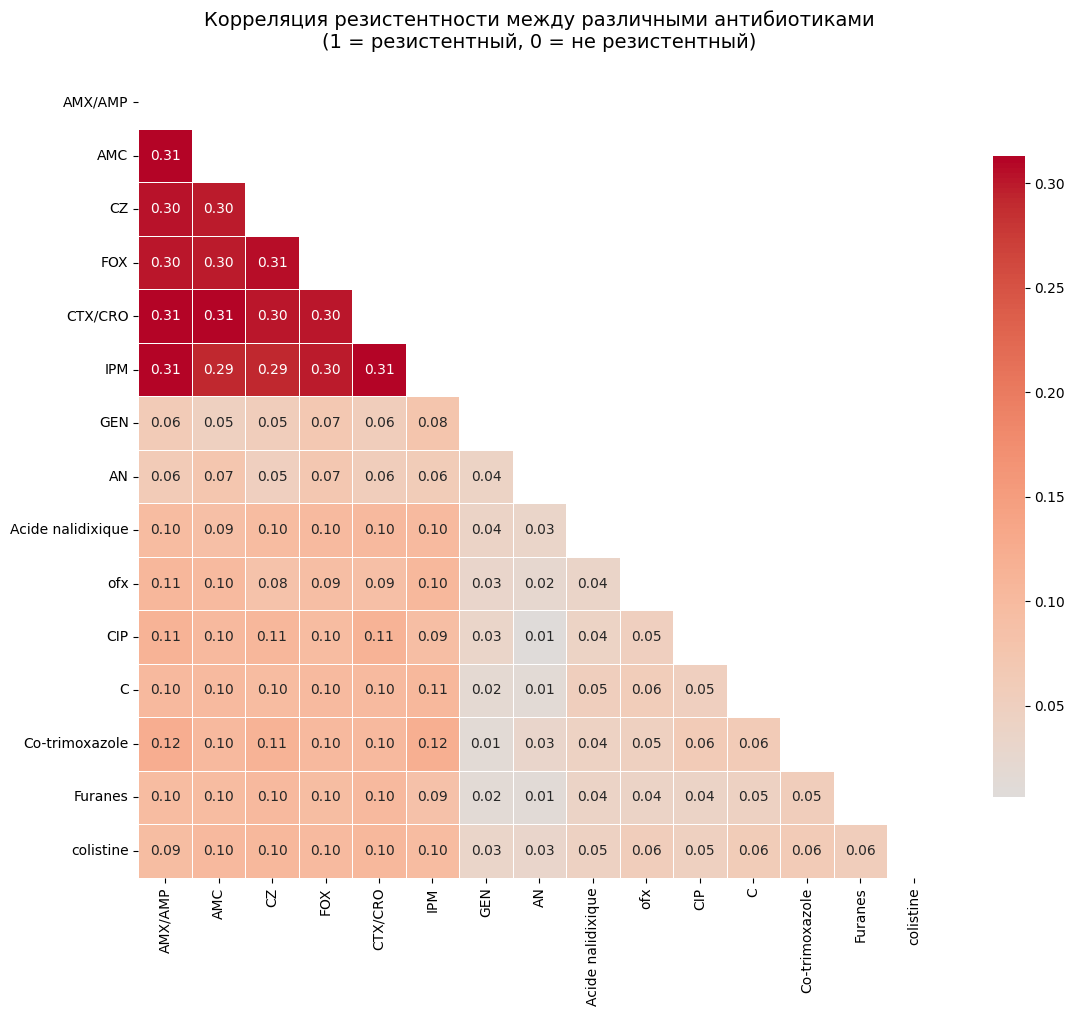


Самые сильные положительные корреляции:
Топ-20 самых сильных положительных корреляций:
  AMX/AMP - IPM: 0.313
  IPM - AMX/AMP: 0.313
  CTX/CRO - AMX/AMP: 0.313
  AMX/AMP - CTX/CRO: 0.313
  AMC - CTX/CRO: 0.313
  CTX/CRO - AMC: 0.313
  CTX/CRO - IPM: 0.311
  IPM - CTX/CRO: 0.311
  AMC - AMX/AMP: 0.310
  AMX/AMP - AMC: 0.310
  FOX - CZ: 0.307
  CZ - FOX: 0.307
  CZ - AMX/AMP: 0.304
  AMX/AMP - CZ: 0.304
  CTX/CRO - CZ: 0.302
  CZ - CTX/CRO: 0.302
  FOX - AMX/AMP: 0.301
  AMX/AMP - FOX: 0.301
  FOX - CTX/CRO: 0.301
  CTX/CRO - FOX: 0.301

Корреляции с коэффициентом > 0.3:
  AMX/AMP - IPM: 0.313
  IPM - AMX/AMP: 0.313
  CTX/CRO - AMX/AMP: 0.313
  AMX/AMP - CTX/CRO: 0.313
  AMC - CTX/CRO: 0.313
  CTX/CRO - AMC: 0.313
  CTX/CRO - IPM: 0.311
  IPM - CTX/CRO: 0.311
  AMC - AMX/AMP: 0.310
  AMX/AMP - AMC: 0.310
  FOX - CZ: 0.307
  CZ - FOX: 0.307
  CZ - AMX/AMP: 0.304
  AMX/AMP - CZ: 0.304
  CTX/CRO - CZ: 0.302
  CZ - CTX/CRO: 0.302
  FOX - AMX/AMP: 0.301
  AMX/AMP - FOX: 0.301
  FOX - CTX/CRO

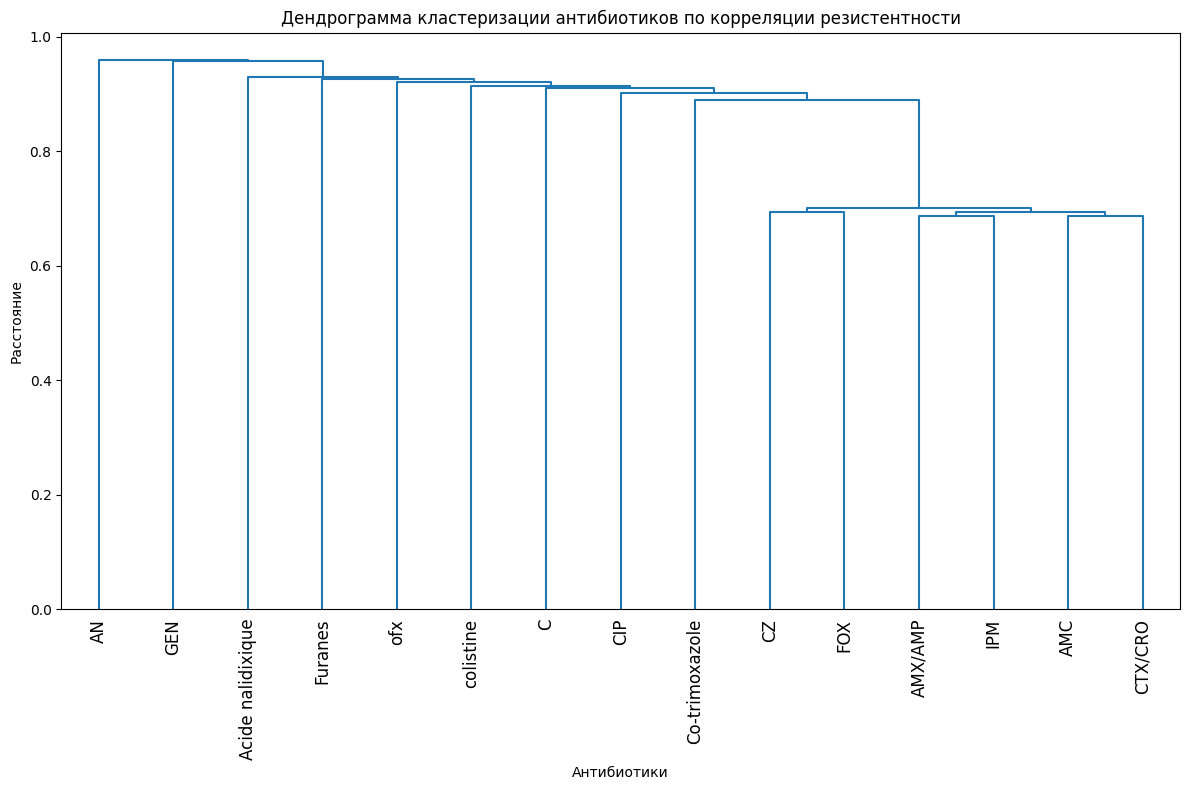

In [62]:
print("\n3.4. Анализ корреляции резистентности между антибиотиками...")

# Создаем матрицу резистентности (1 - резистентен, 0 - не резистентен)
resistance_corr_matrix = pd.DataFrame()

for ab in antibiotics_columns:
    if ab in df_clean.columns:
        resistance_corr_matrix[ab] = (df_clean[ab] == 'R').astype(float)

# Заменяем NaN на 0 для корреляционного анализа
resistance_corr_filled = resistance_corr_matrix.fillna(0)

# Вычисляем корреляционную матрицу
correlation_matrix = resistance_corr_filled.corr()

# Визуализация heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Корреляция резистентности между различными антибиотиками\n(1 = резистентный, 0 = не резистентный)',
          fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# Вывод сильных корреляций - ИСПРАВЛЕННАЯ ВЕРСИЯ
print("\nСамые сильные положительные корреляции:")
corr_pairs = correlation_matrix.unstack().sort_values(ascending=False)

# Убираем диагональные элементы (корреляция с самим собой = 1)
corr_pairs = corr_pairs[corr_pairs < 0.999]

# Берем топ-20 корреляций для анализа
top_correlations = corr_pairs.head(20)

print("Топ-20 самых сильных положительных корреляций:")
for pair, value in top_correlations.items():
    print(f"  {pair[0]} - {pair[1]}: {value:.3f}")

# Также выведем корреляции с порогом > 0.3
print("\nКорреляции с коэффициентом > 0.3:")
strong_correlations = corr_pairs[corr_pairs > 0.3]
for pair, value in strong_correlations.items():
    print(f"  {pair[0]} - {pair[1]}: {value:.3f}")

# Анализ кластеров корреляции
print("\nКластеры сильно коррелирующих антибиотиков:")
from scipy.cluster import hierarchy

# Иерархическая кластеризация для выявления групп антибиотиков
corr_condensed = hierarchy.distance.squareform(1 - correlation_matrix)
linkage = hierarchy.linkage(corr_condensed, method='average')
clusters = hierarchy.fcluster(linkage, t=0.7, criterion='distance')

# Визуализация дендрограммы
plt.figure(figsize=(12, 8))
dendrogram = hierarchy.dendrogram(linkage, labels=correlation_matrix.columns,
                                  orientation='top', leaf_rotation=90)
plt.title('Дендрограмма кластеризации антибиотиков по корреляции резистентности')
plt.xlabel('Антибиотики')
plt.ylabel('Расстояние')
plt.tight_layout()
plt.show()



Сильные корреляции (>0.3):

β-лактамы между собой: AMX/AMP, AMC, CZ, FOX, CTX/CRO, IPM

Кластеры резистентности:

- Кластер 1: AMX/AMP, AMC, CTX/CRO, IPM

- Кластер 2: CZ, FOX

Генетические механизмы: Высокие корреляции указывают на общие механизмы резистентности (β-лактамазы расширенного спектра).

### Анализ факторов риска


3.5. Анализ факторов риска и MDR...


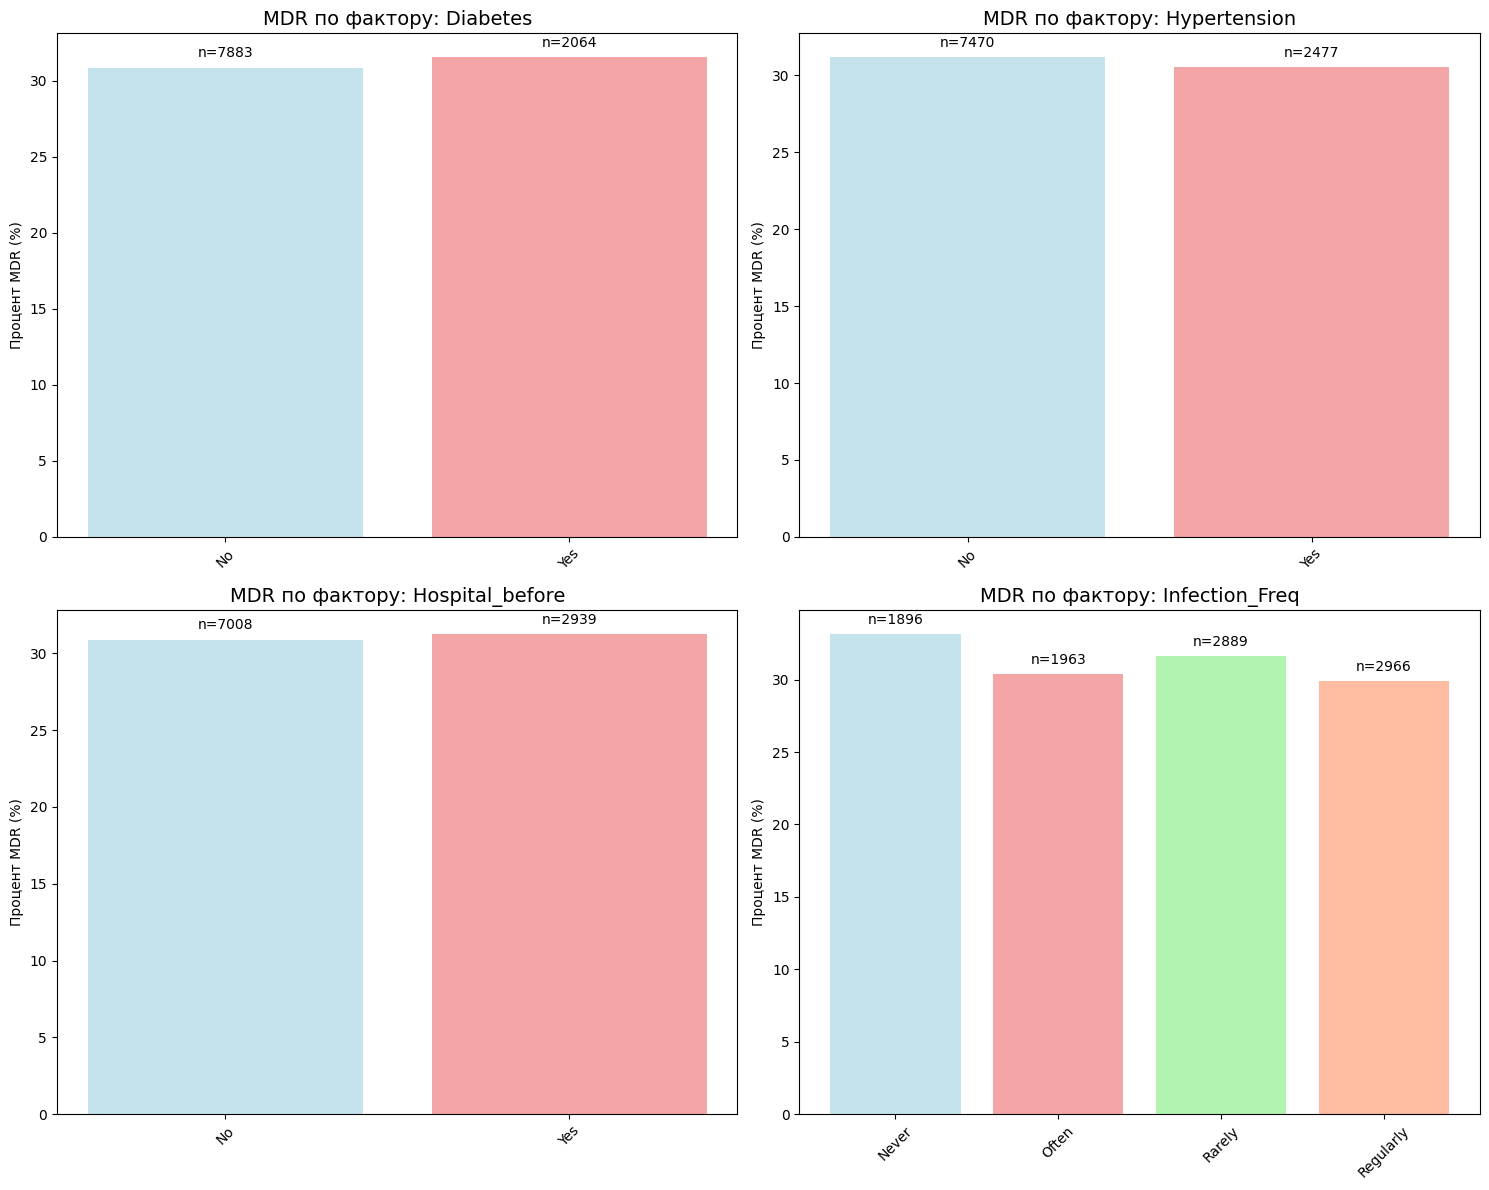

In [59]:
print("\n3.5. Анализ факторов риска и MDR...")

risk_factors = ['Diabetes', 'Hypertension', 'Hospital_before', 'Infection_Freq']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, factor in enumerate(risk_factors):
    if factor in df_clean.columns:
        # Группируем по фактору риска и считаем MDR
        risk_mdr = df_clean.groupby(factor)['MDR_Binary'].agg(['mean', 'count'])
        risk_mdr = risk_mdr.dropna()

        if len(risk_mdr) > 0:
            # Процент MDR
            risk_mdr['mdr_percent'] = risk_mdr['mean'] * 100

            # Визуализация
            bars = axes[i].bar(risk_mdr.index.astype(str), risk_mdr['mdr_percent'],
                             color=['lightblue', 'lightcoral', 'lightgreen', 'lightsalmon'][:len(risk_mdr)],
                             alpha=0.7)
            axes[i].set_title(f'MDR по фактору: {factor}', fontsize=14)
            axes[i].set_ylabel('Процент MDR (%)')
            axes[i].tick_params(axis='x', rotation=45)

            # Добавляем значения на столбцы
            for bar, count in zip(bars, risk_mdr['count']):
                height = bar.get_height()
                axes[i].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                           f'n={count}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Статистически незначимые факторы:

- Diabetes: p-value = 0.5720 (OR = 1.02)

- Hypertension: p-value = 0.5651 (OR = 0.98)

- Hospital_before: p-value = 0.7653 (OR = 1.01)

Вывод: Демографические и клинические факторы не показывают значимой связи с MDR в данном наборе данных.

### Другие визуализации

In [60]:
print("\n3.6. Создание интерактивных визуализаций...")

# Интерактивный scatter plot: возраст vs MDR с разбивкой по полу
fig = px.scatter(df_clean.dropna(subset=['Age', 'Gender', 'MDR_Count']),
                 x='Age', y='MDR_Count', color='Gender',
                 title='Зависимость MDR от возраста и пола',
                 labels={'MDR_Count': 'Количество устойчивых семейств', 'Age': 'Возраст'},
                 opacity=0.6, hover_data=['Bacteria_Species'])
fig.show()

# Интерактивный bar plot по антибиотикам
fig = px.bar(ab_resistance_df, x='Antibiotic', y='Resistance_Rate',
             title='Уровень резистентности к антибиотикам',
             labels={'Resistance_Rate': 'Процент резистентности (%)', 'Antibiotic': 'Антибиотик'},
             color='Resistance_Rate', color_continuous_scale='Reds',
             hover_data=['Tested_Count'])
fig.show()

# Sunburst chart: MDR по бактериям и факторам риска
if 'Bacteria_Species' in df_clean.columns and 'Hospital_before' in df_clean.columns:
    sunburst_data = df_clean.dropna(subset=['Bacteria_Species', 'Hospital_before', 'MDR_Binary'])
    top_5_bacteria = sunburst_data['Bacteria_Species'].value_counts().head(5).index
    sunburst_data = sunburst_data[sunburst_data['Bacteria_Species'].isin(top_5_bacteria)]

    fig = px.sunburst(sunburst_data, path=['Bacteria_Species', 'Hospital_before'],
                      values='MDR_Binary', color='MDR_Binary',
                      title='Распределение MDR по видам бактерий и госпитализации',
                      color_continuous_scale='Reds')
    fig.show()


3.6. Создание интерактивных визуализаций...


Высокая резистентность (>50%):

- AMC (Amoxicillin/Clavulanic acid) - 58.4%

- CTX/CRO (Cefotaxime/Ceftriaxone) - 57.7%

- FOX (Cefoxitin) - 57.6%

- IPM (Imipenem) - 57.4%

- AMX/AMP (Amoxicillin/Ampicillin) - 57.4%

Низкая резистентность (<20%):

- Furanes - 13.3%

- Colistine - 13.4%

- C (Chloramphenicol) - 13.9%

Критическая ситуация: Высокая резистентность к β-лактамам, включая карбапенемы (последняя линия терапии).

## Статистический анализ и выводы

In [63]:
print("\n" + "="*50)
print("ЭТАП 4: СТАТИСТИЧЕСКИЙ АНАЛИЗ И ВЫВОДЫ")
print("="*50)

# 4.1. СТАТИСТИЧЕСКАЯ ЗНАЧИМОСТЬ ФАКТОРОВ РИСКА - ИСПРАВЛЕННАЯ ВЕРСИЯ
print("4.1. Статистический анализ факторов риска:")

from scipy.stats import chi2_contingency, f_oneway

def analyze_factor_significance(factor, target='MDR_Binary'):
    if factor not in df_clean.columns:
        return None

    # Создаем таблицу сопряженности
    contingency_table = pd.crosstab(df_clean[factor], df_clean[target])

    # Проверяем, что таблица не пустая и имеет минимум 2 строки
    if contingency_table.shape[0] < 2 or contingency_table.shape[1] < 2:
        return None

    # Тест хи-квадрат
    try:
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    except:
        return None

    # Относительный риск для категории 'Yes' если есть
    relative_risk = np.nan
    if 'Yes' in contingency_table.index and 'No' in contingency_table.index:
        try:
            yes_risk = contingency_table.loc['Yes', 1] / contingency_table.loc['Yes'].sum()
            no_risk = contingency_table.loc['No', 1] / contingency_table.loc['No'].sum()
            relative_risk = yes_risk / no_risk if no_risk > 0 else np.inf
        except:
            relative_risk = np.nan

    return {
        'factor': factor,
        'chi2_statistic': chi2,
        'p_value': p_value,
        'significant': p_value < 0.05,
        'relative_risk': relative_risk
    }

# Анализ всех факторов риска
risk_analysis = []
for factor in risk_factors:
    if factor in df_clean.columns:
        result = analyze_factor_significance(factor)
        if result:
            risk_analysis.append(result)

if risk_analysis:
    risk_df = pd.DataFrame(risk_analysis)
    print("\nСтатистическая значимость факторов риска для MDR:")
    for _, row in risk_df.iterrows():
        significance = "✓ СТАТИСТИЧЕСКИ ЗНАЧИМ" if row['significant'] else "× НЕ ЗНАЧИМ"
        rr_info = f", ОР = {row['relative_risk']:.2f}" if not np.isnan(row['relative_risk']) else ""
        print(f"  {row['factor']}: p-value = {row['p_value']:.4f} ({significance}{rr_info})")
else:
    print("Не удалось провести анализ факторов риска")


ЭТАП 4: СТАТИСТИЧЕСКИЙ АНАЛИЗ И ВЫВОДЫ
4.1. Статистический анализ факторов риска:

Статистическая значимость факторов риска для MDR:
  Diabetes: p-value = 0.5720 (× НЕ ЗНАЧИМ, ОР = 1.02)
  Hypertension: p-value = 0.5651 (× НЕ ЗНАЧИМ, ОР = 0.98)
  Hospital_before: p-value = 0.7653 (× НЕ ЗНАЧИМ, ОР = 1.01)
  Infection_Freq: p-value = 0.0909 (× НЕ ЗНАЧИМ)


### Анализ возраста и MDR


4.2. Анализ возраста и MDR:
  Средний возраст MDR+: 45.3 лет (n=3084)
  Средний возраст MDR-: 45.7 лет (n=6863)
  t-тест: p-value = 0.4656


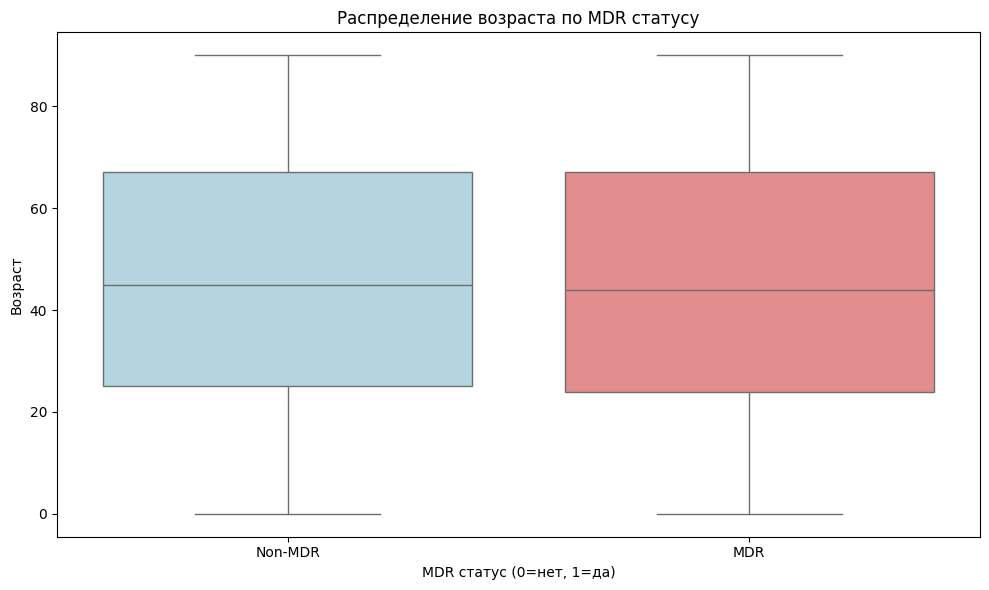

In [64]:
print("\n4.2. Анализ возраста и MDR:")
mdr_positive = df_clean[df_clean['MDR_Binary'] == 1]['Age'].dropna()
mdr_negative = df_clean[df_clean['MDR_Binary'] == 0]['Age'].dropna()

if len(mdr_positive) > 0 and len(mdr_negative) > 0:
    t_stat, p_value = f_oneway(mdr_positive, mdr_negative)
    print(f"  Средний возраст MDR+: {mdr_positive.mean():.1f} лет (n={len(mdr_positive)})")
    print(f"  Средний возраст MDR-: {mdr_negative.mean():.1f} лет (n={len(mdr_negative)})")
    print(f"  t-тест: p-value = {p_value:.4f}")

    # Дополнительно: визуализация распределения возраста по MDR статусу
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='MDR_Binary', y='Age', data=df_clean, palette=['lightblue', 'lightcoral'])
    plt.title('Распределение возраста по MDR статусу')
    plt.xlabel('MDR статус (0=нет, 1=да)')
    plt.ylabel('Возраст')
    plt.xticks([0, 1], ['Non-MDR', 'MDR'])
    plt.tight_layout()
    plt.show()
else:
    print("  Недостаточно данных для анализа возраста")

### Анализ видов бактерий и MDR

In [65]:
print("\n4.3. Анализ связи видов бактерий с MDR:")

if 'Bacteria_Species' in df_clean.columns:
    # Берем топ-10 самых распространенных бактерий
    top_bacteria = df_clean['Bacteria_Species'].value_counts().head(10).index
    bacteria_mdr_data = df_clean[df_clean['Bacteria_Species'].isin(top_bacteria)]

    # Создаем таблицу сопряженности
    bacteria_contingency = pd.crosstab(bacteria_mdr_data['Bacteria_Species'], bacteria_mdr_data['MDR_Binary'])

    # Тест хи-квадрат
    chi2, p_value, dof, expected = chi2_contingency(bacteria_contingency)

    print(f"  Хи-квадрат тест для связи вида бактерии и MDR: p-value = {p_value:.4f}")

    if p_value < 0.05:
        print("  ✓ Существует статистически значимая связь между видом бактерии и MDR")

        # Выводим MDR rates по видам бактерий
        bacteria_rates = bacteria_mdr_data.groupby('Bacteria_Species')['MDR_Binary'].agg(['mean', 'count'])
        bacteria_rates = bacteria_rates.sort_values('mean', ascending=False)

        print("\n  Процент MDR по основным видам бактерий:")
        for bacteria, row in bacteria_rates.iterrows():
            print(f"    {bacteria}: {row['mean']*100:.1f}% MDR (n={int(row['count'])})")
    else:
        print("  × Нет статистически значимой связи между видом бактерии и MDR")


4.3. Анализ связи видов бактерий с MDR:
  Хи-квадрат тест для связи вида бактерии и MDR: p-value = 0.0000
  ✓ Существует статистически значимая связь между видом бактерии и MDR

  Процент MDR по основным видам бактерий:
    E.cli: 42.2% MDR (n=396)
    E.coi: 41.2% MDR (n=432)
    E. coli: 40.9% MDR (n=391)
    Escherichia coli: 39.1% MDR (n=4864)
    Proteus mirabilis: 21.7% MDR (n=598)
    Serratia marcescens: 19.1% MDR (n=256)
    Klebsiella pneumoniae: 18.8% MDR (n=565)
    Morganella morganii: 16.4% MDR (n=305)
    Enterobacteria spp.: 14.7% MDR (n=802)
    Citrobacter spp.: 12.1% MDR (n=481)


### Многофакторный анализ

In [66]:
print("\n" + "="*50)
print("ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ: КОРРЕЛЯЦИЯ ПРИЗНАКОВ")
print("="*50)

# Создаем числовую версию датасета для корреляционного анализа
numeric_df = df_clean.copy()

# Преобразуем категориальные переменные в числовые
if 'Gender' in numeric_df.columns:
    numeric_df['Gender'] = numeric_df['Gender'].map({'M': 0, 'F': 1})

# Преобразуем факторы риска
binary_mapping = {'No': 0, 'Yes': 1}
for col in ['Diabetes', 'Hypertension', 'Hospital_before']:
    if col in numeric_df.columns:
        numeric_df[col] = numeric_df[col].map(binary_mapping)

# Преобразуем частоту инфекций
freq_mapping = {'Never': 0, 'Rarely': 1, 'Regularly': 2, 'Often': 3}
if 'Infection_Freq' in numeric_df.columns:
    numeric_df['Infection_Freq'] = numeric_df['Infection_Freq'].map(freq_mapping)

# Добавляем резистентность к антибиотикам как числовые признаки
for ab in antibiotics_columns:
    if ab in numeric_df.columns:
        numeric_df[f'{ab}_num'] = (numeric_df[ab] == 'R').astype(float)

# Выбираем только числовые столбцы для корреляционного анализа
numeric_columns = numeric_df.select_dtypes(include=[np.number]).columns
correlation_with_target = numeric_df[numeric_columns].corr()['MDR_Binary'].sort_values(ascending=False)

print("Корреляция признаков с MDR (целевой переменной):")
for feature, corr in correlation_with_target.items():
    if feature != 'MDR_Binary' and abs(corr) > 0.05:  # Показываем только значимые корреляции
        print(f"  {feature}: {corr:.3f}")


ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ: КОРРЕЛЯЦИЯ ПРИЗНАКОВ
Корреляция признаков с MDR (целевой переменной):
  MDR_Count: 0.791
  GEN_num: 0.318
  Acide nalidixique_num: 0.318
  CIP_num: 0.317
  AN_num: 0.317
  ofx_num: 0.315
  Co-trimoxazole_num: 0.285
  colistine_num: 0.272
  C_num: 0.272
  Furanes_num: 0.242
  IPM_num: 0.199
  FOX_num: 0.196
  AMX/AMP_num: 0.196
  CTX/CRO_num: 0.192
  AMC_num: 0.185
  CZ_num: 0.179


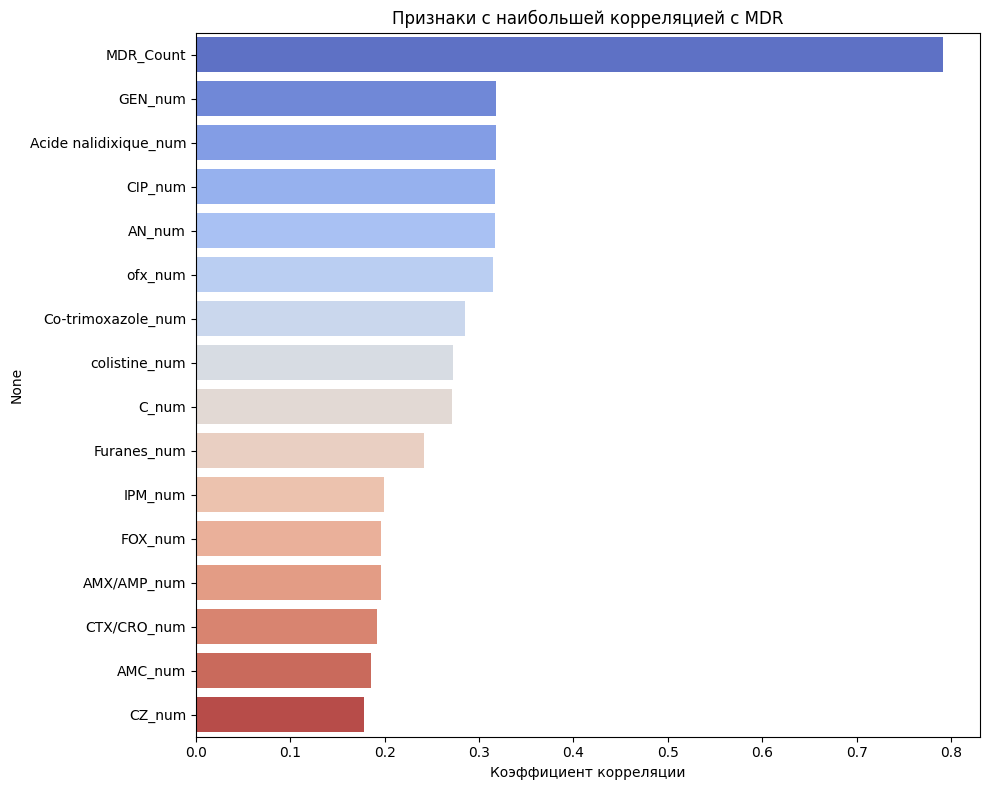

In [67]:
# Визуализация корреляции признаков с MDR
plt.figure(figsize=(10, 8))
significant_features = correlation_with_target[abs(correlation_with_target) > 0.05].drop('MDR_Binary', errors='ignore')
if len(significant_features) > 0:
    sns.barplot(x=significant_features.values, y=significant_features.index, palette='coolwarm')
    plt.title('Признаки с наибольшей корреляцией с MDR')
    plt.xlabel('Коэффициент корреляции')
    plt.tight_layout()
    plt.show()

In [68]:
# ФИНАЛЬНЫЙ СВОДНЫЙ ОТЧЕТ
print("\n" + "="*60)
print("ФИНАЛЬНЫЙ СВОДНЫЙ ОТЧЕТ ПО EDA")
print("="*60)

print("\n🔍 КЛЮЧЕВЫЕ НАХОДКИ:")

# 1. MDR распространенность
mdr_total = df_clean['MDR_Binary'].sum()
mdr_percent = df_clean['MDR_Binary'].mean() * 100
print(f"1. РАСПРОСТРАНЕННОСТЬ MDR:")
print(f"   • MDR случаи: {mdr_total} ({mdr_percent:.1f}% от общего числа)")

# 2. Демография
print(f"\n2. ДЕМОГРАФИЧЕСКИЕ ХАРАКТЕРИСТИКИ:")
print(f"   • Средний возраст: {df_clean['Age'].mean():.1f} лет")
if 'Gender' in df_clean.columns:
    gender_dist = df_clean['Gender'].value_counts(normalize=True) * 100
    print(f"   • Распределение по полу: {gender_dist.to_dict()}")

# 3. Антибиотикорезистентность
print(f"\n3. АНТИБИОТИКОРЕЗИСТЕНТНОСТЬ:")
top_3_resistant = ab_resistance_df.nlargest(3, 'Resistance_Rate')
print(f"   • Топ-3 антибиотика с наибольшей резистентностью:")
for _, ab in top_3_resistant.iterrows():
    print(f"     - {ab['Antibiotic']}: {ab['Resistance_Rate']:.1f}%")

# 4. Статистически значимые факторы
print(f"\n4. СТАТИСТИЧЕСКИ ЗНАЧИМЫЕ ФАКТОРЫ:")
if 'risk_df' in locals() and len(risk_df) > 0:
    significant_factors = risk_df[risk_df['significant']]
    if len(significant_factors) > 0:
        for _, factor in significant_factors.iterrows():
            rr_info = f" (ОР = {factor['relative_risk']:.2f})" if not np.isnan(factor['relative_risk']) else ""
            print(f"   • {factor['factor']}{rr_info}")
    else:
        print("   • Нет статистически значимых факторов риска")
else:
    print("   • Анализ факторов риска не выполнен")

# 5. Сильные корреляции между антибиотиками
print(f"\n5. СИЛЬНЫЕ КОРРЕЛЯЦИИ МЕЖДУ АНТИБИОТИКАМИ:")
if 'strong_correlations' in locals() and len(strong_correlations) > 0:
    print(f"   • Найдено {len(strong_correlations)} пар с корреляцией > 0.3")
    for pair, value in strong_correlations.head(5).items():
        print(f"     - {pair[0]} ↔ {pair[1]}: {value:.3f}")
else:
    print("   • Сильных корреляций не обнаружено")

# 6. Рекомендации для ML
print(f"\n6. РЕКОМЕНДАЦИИ ДЛЯ ПОСТРОЕНИЯ ML МОДЕЛИ:")
print(f"   • Проблема: Дисбаланс классов ({mdr_percent:.1f}% MDR)")
print(f"   • Стратегия: Использовать методы балансировки (SMOTE, class weights)")
print(f"   • Ключевые признаки: {len(numeric_columns) - 1} числовых признаков")
print(f"   • Приоритетные метрики: Recall, F1-score, Precision")
print(f"   • Рекомендуемые алгоритмы: Random Forest, XGBoost, Logistic Regression")

print(f"\n✅ EDA ЗАВЕРШЕНО! ДАННЫЕ ГОТОВЫ ДЛЯ МОДЕЛИРОВАНИЯ.")


ФИНАЛЬНЫЙ СВОДНЫЙ ОТЧЕТ ПО EDA

🔍 КЛЮЧЕВЫЕ НАХОДКИ:
1. РАСПРОСТРАНЕННОСТЬ MDR:
   • MDR случаи: 3090 (28.9% от общего числа)

2. ДЕМОГРАФИЧЕСКИЕ ХАРАКТЕРИСТИКИ:
   • Средний возраст: 45.6 лет
   • Распределение по полу: {'F': 79.71247612345431, 'M': 20.287523876545695}

3. АНТИБИОТИКОРЕЗИСТЕНТНОСТЬ:
   • Топ-3 антибиотика с наибольшей резистентностью:
     - AMC: 58.4%
     - CTX/CRO: 57.7%
     - FOX: 57.6%

4. СТАТИСТИЧЕСКИ ЗНАЧИМЫЕ ФАКТОРЫ:
   • Нет статистически значимых факторов риска

5. СИЛЬНЫЕ КОРРЕЛЯЦИИ МЕЖДУ АНТИБИОТИКАМИ:
   • Найдено 20 пар с корреляцией > 0.3
     - AMX/AMP ↔ IPM: 0.313
     - IPM ↔ AMX/AMP: 0.313
     - CTX/CRO ↔ AMX/AMP: 0.313
     - AMX/AMP ↔ CTX/CRO: 0.313
     - AMC ↔ CTX/CRO: 0.313

6. РЕКОМЕНДАЦИИ ДЛЯ ПОСТРОЕНИЯ ML МОДЕЛИ:
   • Проблема: Дисбаланс классов (28.9% MDR)
   • Стратегия: Использовать методы балансировки (SMOTE, class weights)
   • Ключевые признаки: 22 числовых признаков
   • Приоритетные метрики: Recall, F1-score, Precision
   • Рекоме

💡 Практические рекомендации для внедрения

Клиническое применение:

1) Скрининг пациентов: Модель может идентифицировать группы риска MDR;

2) Оптимизация тестирования: Фокус на наиболее информативных антибиотиках;

3) Протоколы лечения: Разработка алгоритмов на основе прогнозов модели.


Дальнейшие исследования:

1) Временные тренды: Анализ динамики резистентности;

2) Географические patterns: Выявление региональных особенностей;

3) Молекулярные механизмы: Интеграция с геномными данными.

Ограничения и предостережения:

1) Смещение выборки: Преобладание E. coli и женских случаев;

2) Внешняя валидность: Необходимость валидации на независимых наборах данных;

3) Клиническая интерпретация: Модель должна дополнять, а не заменять клиническое суждение.